In [7]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#hiding warning messages
import warnings
warnings.filterwarnings("ignore")

data_both = pd.read_csv('Final_Merged_CSV')

In [9]:
#potency values for agonists and antagonists
ag_pot = data_both['Ratio Potency (uM)'].where(data_both['Activity Summary'] == 'active agonist')
ag_pot = ag_pot.dropna()
antag_pot = data_both['Ratio Potency (uM)'].where(data_both['Activity Summary'] == 'active antagonist')
antag_pot = antag_pot.dropna()
pot = ag_pot.append(antag_pot)


#efficacy values for agonists and antagonists
ag_eff = data_both['Ratio Efficacy (%)'].where(data_both['Activity Summary'] == 'active agonist')
ag_eff = ag_eff.dropna()
antag_eff = data_both['Ratio Efficacy (%)'].where(data_both['Activity Summary'] == 'active antagonist')
antag_eff = antag_eff.dropna()
eff = ag_eff.append(antag_eff)

#combining lists into a total df
pot_eff = pd.concat([pot, eff], axis = 1)
pot_eff = pot_eff.dropna()

#agonist dataframe
ag = pd.concat([ag_pot, ag_eff], axis = 1)
ag = ag.dropna()

#antagonist dataframe
antag = pd.concat([antag_pot, antag_eff], axis = 1)
antag = antag.dropna()

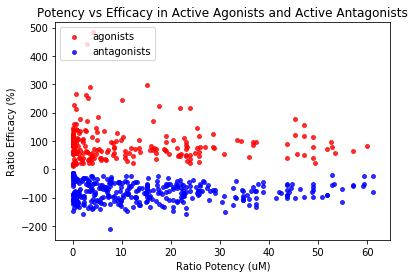

In [10]:
#scatterplot of potency vs efficacy values
##CORRECT scatterplot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(ag['Ratio Potency (uM)'], ag['Ratio Efficacy (%)'], c = 'red', alpha = 0.8, s = 15, label = "agonists")
ax.scatter(antag['Ratio Potency (uM)'], antag['Ratio Efficacy (%)'], c = 'blue', alpha = 0.8, s = 15, label = "antagonists")

plt.title('Potency vs Efficacy in Active Agonists and Active Antagonists')
plt.xlabel("Ratio Potency (uM)")
plt.ylabel("Ratio Efficacy (%)")
plt.legend(loc=2)
plt.show()